<a href="https://colab.research.google.com/github/Akshayakrishna262/mlapplications/blob/main/Claimants_Pred(logisReg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=list(uploaded.keys())[0]
df=pd.read_csv(df)

Saving claimants(ad).csv to claimants(ad) (1).csv


In [ ]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [ ]:
correlation = df['ATTORNEY'].corr(df['LOSS'])

In [ ]:
correlation

-0.2197150271023389

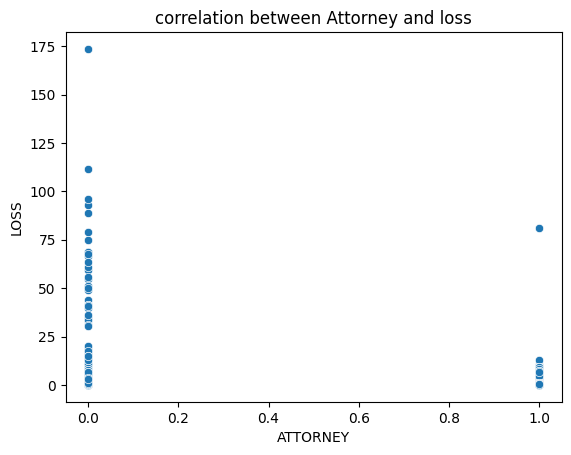

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='ATTORNEY',y='LOSS',data=df)

plt.title("correlation between Attorney and loss")
plt.xlabel("ATTORNEY")
plt.ylabel("LOSS")
plt.show()

In [ ]:
correlation = df['CASENUM'].corr(df['CLMSEX'])
correlation


0.028150787110294506

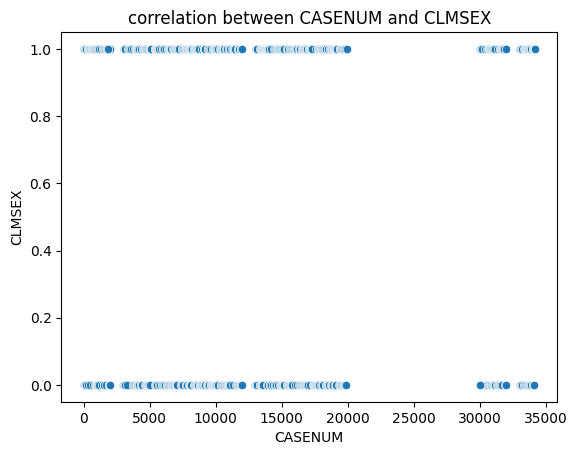

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='CASENUM',y='CLMSEX',data=df)

plt.title("correlation between CASENUM and CLMSEX")
plt.xlabel("CASENUM")
plt.ylabel("CLMSEX")
plt.show()

In [ ]:
corr=df.corr()
corr

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
CASENUM,1.000000,0.011717,0.028151,0.046044,-0.010003,-0.002512,-0.049590
ATTORNEY,0.011717,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.028151,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.046044,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.010003,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,-0.002512,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.049590,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


In [ ]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression

st.title('Model Deployment: Logistic Regression')
st.sidebar.header('User Input Parameters')

def user_input_features():
    CLMSEX = st.sidebar.selectbox('Gender', ('1','0'))
    CLMINSUR = st.sidebar.selectbox('Insurance',('1','0'))
    SEATBELT = st.sidebar.selectbox('SeatBelt',('1','0'))
    CLMAGE = st.sidebar.number_input('Insert the age')
    LOSS = st.sidebar.number_input('Insert Loss')
    data = {'CLMSEX':CLMSEX,
            'CLMINSUR':CLMINSUR,
            'SEATBELT':SEATBELT,
            'CLMAGE':CLMAGE,
            'LOSS':LOSS}
    features = pd.DataFrame(data, index = [0])
    return features
df = user_input_features()
st.subheader('User Input parameters')
st.write(df)

claimants = pd.read_csv("claimants.csv")
claimants.drop(["CASENUM"],inplace=True,axis = 1)

claimants = claimants.dropna()

X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
clf = LogisticRegression()
clf.fit(X,Y)

prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

st.subheader('Predicted Result')
st.write('Yes' if prediction_proba[0][1] > 0.5 else 'No')

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from pickle import load
from pickle import dump

claimants = pd.read_csv("claimants(ad).csv")
claimants = claimants.drop(['CASENUM'],inplace=True,axis=1)
claimants = claimants.dropna()
print(claimants)

X = claimants.iloc[:,[1,2,3,4,5]]
print(X)
Y = claimants.iloc[:, 1]
print(Y)
model.LogisticRegression(max_iter=300)
model.fit(X,Y)

dump(model, open('Logistic_Model.sav', 'wb'))

loaded_model = load(open('Logistic_Model.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'claimants(ad).csv'